In [1]:
%load_ext autoreload
%autoreload
from tracking import visualise_tracks, track,consolidate_indices, iou_track
from utils import verify_ID_uniqueness, visualise_image, visualise_masks
from make_gaussians import add_centroids,make_gaussian_masks, visualise_gaussians
from make_dataset import make_dataset,visualise_dataset_inputs
from manipulate_dataset import MakeDataSplits, merge_data
from resize_data import resize_data, scale_data
from discard import score_and_pos_discard, class_and_size_discard

/opt/Python/Python-3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/Python/Python-3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import h5py
import os
ROOT_DIR = os.path.abspath("../")
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt

In [16]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

name = 'football1and2'

data_file = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name,name))
class_filtered_file = os.path.join(PROCESSED_PATH, "{}/{}_cls_filtered.hdf5".format(name,name))

tracked_file = os.path.join(PROCESSED_PATH, "{}/{}_tracked.hdf5".format(name,name))
tracked_file_c = os.path.join(PROCESSED_PATH, "{}/{}_tracked_c.hdf5".format(name,name))
resized_file = os.path.join(PROCESSED_PATH, "{}/{}_resized.hdf5".format(name,name))
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name))
set_idx_file = os.path.join(PROCESSED_PATH, "{}/{}_sets.pickle".format(name,name))


target_folder = os.path.join(PROCESSED_PATH, "{}/mask_images/".format(name))
target_folder_consolidated = os.path.join(PROCESSED_PATH, "{}/tracked_images_consolidated/".format(name))
target_folder_gauss = os.path.join(PROCESSED_PATH, "{}/tracked_images_gauss/".format(name))

In [12]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

name = "Football1and2_lt"

data_file1 = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name,name))
class_filtered_file1 = os.path.join(PROCESSED_PATH, "{}/{}_cls_filtered.hdf5".format(name,name))

tracked_file1 = os.path.join(PROCESSED_PATH, "{}/{}_tracked.hdf5".format(name,name))
tracked_file1_c = os.path.join(PROCESSED_PATH, "{}/{}_tracked_c.hdf5".format(name,name))
resized_file1 = os.path.join(PROCESSED_PATH, "{}/{}_resized.hdf5".format(name,name))
dataset_file1 = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name))
set_idx_file1 = os.path.join(PROCESSED_PATH, "{}/{}_sets.pickle".format(name,name))


target_folder1 = os.path.join(PROCESSED_PATH, "{}/mask_images/".format(name))
target_folder_consolidated1 = os.path.join(PROCESSED_PATH, "{}/tracked_images_consolidated/".format(name))
target_folder_gauss1 = os.path.join(PROCESSED_PATH, "{}/tracked_images_gauss/".format(name))

In [14]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

name = "test_cases/car1"
name2 = "car1"

data_file = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name,name2))
class_filtered_file = os.path.join(PROCESSED_PATH, "{}/{}_cls_filtered.hdf5".format(name,name2))

tracked_file = os.path.join(PROCESSED_PATH, "{}/{}_tracked.hdf5".format(name,name2))
tracked_file_c = os.path.join(PROCESSED_PATH, "{}/{}_tracked_c.hdf5".format(name,name2))
resized_file = os.path.join(PROCESSED_PATH, "{}/{}_resized.hdf5".format(name,name2))
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name2))
set_idx_file = os.path.join(PROCESSED_PATH, "{}/{}_sets.pickle".format(name,name2))


target_folder= os.path.join(PROCESSED_PATH, "{}/mask_images/".format(name))
target_folder_consolidated = os.path.join(PROCESSED_PATH, "{}/tracked_images_consolidated/".format(name))
target_folder_gauss = os.path.join(PROCESSED_PATH, "{}/tracked_images_gauss/".format(name))

In [5]:
names

NameError: name 'names' is not defined

In [4]:
class_and_size_discard(data_file,class_filtered_file,masks_to_keep = ['person'])#, small_threshold = 50, global_stats = False

In [5]:
score_and_pos_discard(class_filtered_file,tracked_file,[('person', 0.8)])#,positions = {'y_min':225}

In [6]:
iou_track(tracked_file)

In [ ]:
tracked_file = class_filtered_file
track(tracked_file)

In [20]:
track(tracked_file, reverse=True)

In [21]:
consolidate_indices(tracked_file)

In [7]:
resize_data(tracked_file, resized_file,256,512)

In [8]:
make_gaussian_masks(resized_file,verbose=0)

In [214]:
visualise_tracks(resized_file, target_folder_consolidated , id_idx = 0)


*** No instances to display *** 


*** No instances to display *** 



In [141]:
visualise_gaussians(resized_file,target_folder_gauss,captions = True)

In [9]:
make_dataset(resized_file, dataset_file)

In [10]:
data_splitter = MakeDataSplits(dataset_file,resized_file)

In [11]:
train_test = data_splitter.make_frame_split('test', 0)

In [14]:
train_val = data_splitter.make_frame_split('val', 0.3, save_path = set_idx_file)

In [15]:
print(train_val)

{'train': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]), 'test': array([], dtype=float64), 'val': array([18, 19, 20, 21])}


In [28]:
visualise_dataset_inputs(dataset_file)

/cs/student/msc/ml/2017/pvalassa/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [18]:
f = h5py.File(dataset_file, "r")

In [19]:
list(f.keys())

['datapoint0',
 'datapoint1',
 'datapoints',
 'future_time',
 'number_inputs',
 'origin_file',
 'timestep']

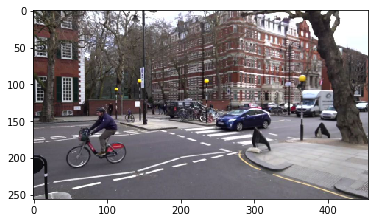

In [20]:
visualise_image(f['datapoint1']['images'].value[:,:,:,0])

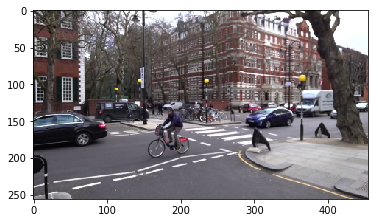

In [21]:
visualise_image(f['datapoint1']['images'].value[:,:,:,1])

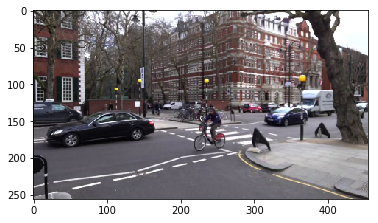

In [22]:
visualise_image(f['datapoint1']['images'].value[:,:,:,2])

In [16]:
visualise_image(f['datapoint0']['masks'].value[:,:,0])

ValueError: Not a location (Invalid object id)

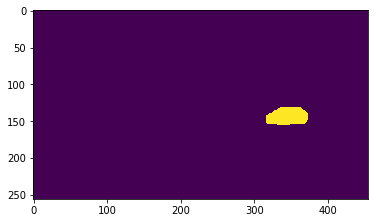

In [11]:
visualise_image(f['datapoint0']['masks'].value[:,:,1])

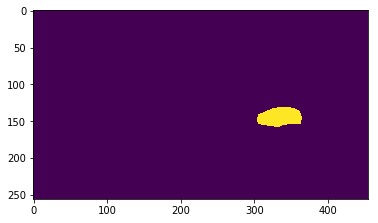

In [12]:
visualise_image(f['datapoint0']['masks'].value[:,:,2])

In [13]:
f.close()

In [16]:
for k,v in f.items():
    print(k,v)

datapoint0 <HDF5 group "/datapoint0" (9 members)>
datapoint1 <HDF5 group "/datapoint1" (9 members)>
datapoint10 <HDF5 group "/datapoint10" (9 members)>
datapoint11 <HDF5 group "/datapoint11" (9 members)>
datapoint12 <HDF5 group "/datapoint12" (9 members)>
datapoint13 <HDF5 group "/datapoint13" (9 members)>
datapoint14 <HDF5 group "/datapoint14" (9 members)>
datapoint15 <HDF5 group "/datapoint15" (9 members)>
datapoint16 <HDF5 group "/datapoint16" (9 members)>
datapoint17 <HDF5 group "/datapoint17" (9 members)>
datapoint18 <HDF5 group "/datapoint18" (9 members)>
datapoint19 <HDF5 group "/datapoint19" (9 members)>
datapoint2 <HDF5 group "/datapoint2" (9 members)>
datapoint3 <HDF5 group "/datapoint3" (9 members)>
datapoint4 <HDF5 group "/datapoint4" (9 members)>
datapoint5 <HDF5 group "/datapoint5" (9 members)>
datapoint6 <HDF5 group "/datapoint6" (9 members)>
datapoint7 <HDF5 group "/datapoint7" (9 members)>
datapoint8 <HDF5 group "/datapoint8" (9 members)>
datapoint9 <HDF5 group "/datap

In [5]:
f['datapoint0']['centroids'].value

array([[115, 161],
       [109, 147],
       [105, 138]])

In [9]:
f['datapoint0']['future_centroid'].value

array([126, 203])

In [8]:
f['datapoint0']['future_mask'].value

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
f['datapoint0']['gaussian_mask'].shape

(176, 314)

In [23]:
f['datapoint0']['images'].shape

(176, 314, 3, 3)

In [10]:
f['datapoint0']['mask_id'].value

array([1])

In [11]:
f['datapoint0']['origin_frame'].shape

(1,)

In [22]:
f['datapoint0']['masks'].value[:,:,0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

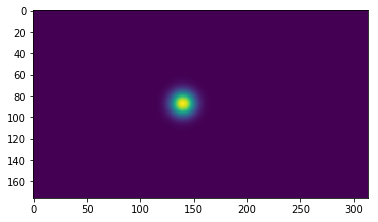

In [53]:
visualise_image(f['datapoint0']['gaussian_mask'].value)

In [35]:
a = f['datapoint0']['masks'].value

In [28]:
b =f['datapoint1']['masks'].value

In [50]:
delta_masks = (a[:,:,2].astype(int)-a[:,:,0].astype(int))

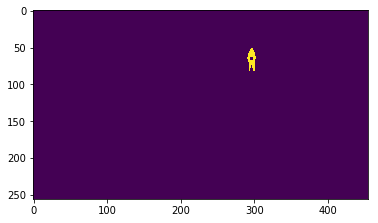

In [43]:
visualise_image(f['datapoint3']['future_mask'].value,centroid_coordinates =f['datapoint3']['future_centroid'].value)

In [17]:
f2 = h5py.File(data_file, "r")

In [ ]:
f2['frame0']['centroids'].value

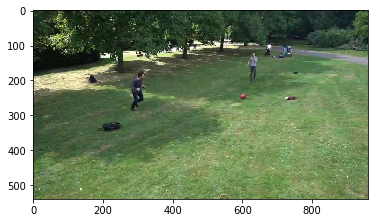

In [39]:
visualise_image(f2['frame1']['image'].value, save_path = os.path.join(PROCESSED_PATH, "{}/{}tets.jpg".format(name,name)) )

In [18]:
a = f2['frame1']['image'].value

In [ ]:
visualise_image(f2['frame1']['masks'].value[:,:,0])

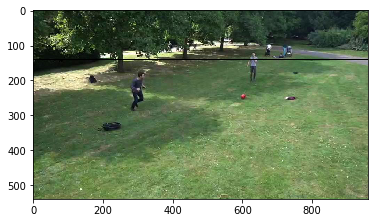

In [47]:
visualise_image(a)

In [16]:
f.close()

In [59]:
f2.close()

In [57]:
f2 = h5py.File(resized_file, "r")

In [58]:
f2['frame1']['image'].shape

(182, 314, 3)

In [60]:
f2['frame1']['centroids'].value

array([[ 63,  39],
       [ 63, 125],
       [ 56,  64],
       [ 57,  79]])

In [19]:
a[223:235,:,:]=0

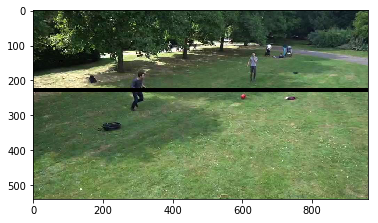

In [20]:
visualise_image(a)

In [66]:
f2.close()

In [10]:
name1 = "Crossing1_sm"
name2 = "Crossing2_sm"
new_name = "Crossing_combined"

data_file1 = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name1,name1))
data_file2 = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name2,name2))

new_folder = os.path.join(PROCESSED_PATH, "{}/".format(new_name))
new_file = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(new_name,new_name))
new_image_folder = os.path.join(new_folder, "images/")

In [11]:
#merge_data(data_file1,data_file2,new_folder, new_name)

In [12]:
#visualise_masks(new_file, new_image_folder)

In [13]:
f = h5py.File(dataset_file,'r')

In [15]:
f2 = h5py.File(resized_file,'r')

In [16]:
data_splitter = MakeDataSplits(dataset_file,resized_file)

In [30]:
train_test_split = data_splitter.make_frame_split('test', 0.1)
print(train_test_split)

{'train': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 17

In [31]:
print(len(train_test_split['train']))

215


In [32]:
print(len(train_test_split['test']))

23


In [33]:
print(f['datapoints'].value)

[238]


In [34]:
print(f2['frame_number'].value)

[196]


In [35]:
print(data_splitter.test_split_datapoint)

214


In [50]:
data_splitter.make_frame_split('val', 0.1)

{'train': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175,

In [51]:
print(len(data_splitter.idx_sets['val']))

23


In [52]:
print(len(data_splitter.idx_sets['train']))

192


In [53]:
for p in data_splitter.idx_sets['train']:
    datapoint = 'datapoint{}'.format(p)
    print(f[datapoint]['origin_frame'].value)

[4]
[5]
[6]
[7]
[8]
[9]
[9]
[10]
[10]
[11]
[11]
[12]
[12]
[13]
[13]
[14]
[14]
[15]
[15]
[16]
[16]
[17]
[17]
[18]
[18]
[19]
[19]
[20]
[20]
[21]
[21]
[22]
[22]
[23]
[23]
[24]
[24]
[25]
[25]
[26]
[26]
[27]
[27]
[28]
[28]
[29]
[29]
[30]
[30]
[31]
[31]
[32]
[32]
[33]
[33]
[34]
[34]
[35]
[35]
[36]
[36]
[37]
[37]
[38]
[38]
[39]
[39]
[40]
[40]
[41]
[41]
[42]
[42]
[43]
[43]
[44]
[44]
[45]
[45]
[46]
[46]
[47]
[47]
[48]
[48]
[49]
[49]
[50]
[50]
[51]
[51]
[52]
[52]
[53]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[88]
[89]
[89]
[90]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[109]
[110]
[110]
[111]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[119]
[120]
[120]
[121]
[121]
[122]
[122]
[123]
[123]
[124]
[124]
[125]
[125]
[126]
[127]
[128]
[129]
[130]
[159]
[160]
[160]
[161]
[161]
[162]
[162]

In [54]:
np.any([val in data_splitter.idx_sets['val'] for val in data_splitter.idx_sets['train'] ])

False

In [55]:
np.any([val in data_splitter.idx_sets['test'] for val in data_splitter.idx_sets['train'] ])

False

In [56]:
np.any([val in data_splitter.idx_sets['test'] for val in data_splitter.idx_sets['val'] ])

False

In [40]:
f1 = h5py.File(dataset_file, 'r')

In [41]:
f2 = h5py.File(dataset_file1,'r')

In [8]:
set1 = pickle.load( open(set_idx_file, "rb" ))

In [9]:
set2 = pickle.load( open(set_idx_file1, "rb" ))

In [10]:
for idx in set2['val']:
    print(idx)

195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214


In [11]:
set1

{'test': array([], dtype=float64),
 'train': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       

In [5]:
f_data_merged = h5py.File(dataset_file,'r')

In [13]:
f_fr_merged = h5py.File(resized_file,'r')

In [14]:
f_data_merged['datapoints'].value

array([430])

In [15]:
f_fr_merged['frame_number'].value

array([262])

In [7]:
f_data_merged['datapoint429']['images'].shape

(256, 455, 3, 3)

In [17]:
f_data_merged['datapoint214']['origin_frame'].value

array([125])

In [18]:
f_data_merged['datapoint215']['origin_frame'].value

array([135])

In [42]:
f1['datapoints'].value

array([10038])

In [43]:
f2['datapoints'].value

array([9766])

In [19]:
f_data_sm = h5py.File(dataset_file1,'r')

In [20]:
f_fr_sm = h5py.File(resized_file1,'r')

In [21]:
f_fr_sm['frame_number'].value

array([131])

In [22]:
f_data_sm['datapoints'].value

array([215])

In [23]:
f_data_sm['datapoint214']['origin_frame'].value

array([125])

In [24]:
f_data_sm['datapoint0']['origin_frame'].value

array([4])

In [25]:
np.all(f_fr_sm['frame130']['centroids'].value ==  f_fr_merged['frame261']['centroids'].value)

True

In [43]:
125+131

256

In [36]:
f1.close()

In [37]:
f2.close()

In [8]:
f_data_merged.close()

In [29]:
f_fr_merged.close()

In [30]:
f_data_sm.close()

In [31]:
f_fr_sm.close()

In [9]:
sets_1 = pickle.load(open(set_idx_file1, "rb"))

In [10]:
sets = pickle.load(open(set_idx_file, "rb"))

In [12]:
np.min(sets['val'])


9036

In [14]:
np.min(sets_1['val'])

13212

In [18]:
f1['datapoint{}'.format(np.min(sets['val']))]['origin_frame'].value

array([4898])

In [19]:
f2['datapoint{}'.format(np.min(sets_1['val']))]['origin_frame'].value

array([7632])

In [16]:
names = ['Crossing1','Football1and2', 'Crossing1and2','Crossing1_lt','Football1and2_lt', 'Crossing1and2_lt']

In [28]:


for name in names:
    stats_file = os.path.join(PROCESSED_PATH, "{}/{}_stats.pickle".format(name,name))
   
    stats = pickle.load(open(stats_file, "rb"))
    print('name: {}'.format(name))
    print('train dist: {} +- {}'.format(stats['train']['dist_mean'],stats['train']['dis_std']))
    print('train mask iou: {} +- {}'.format(stats['train']['iou_mask_mean'],stats['train']['iou_mask_sdt']))
    print('train bbox iou: {} +- {}'.format(stats['train']['iou_bbox_mean'],stats['train']['iou_bbox_std']))
    print('val dist: {} +- {}'.format(stats['val']['dist_mean'],stats['val']['dis_std']))
    print('val mask iou: {} +- {}'.format(stats['val']['iou_mask_mean'],stats['val']['iou_mask_sdt']))
    print('val bbox iou: {} +- {}'.format(stats['val']['iou_bbox_mean'],stats['val']['iou_bbox_std']))
    print('tots dist: {} '.format((stats['val']['dist_mean']+stats['train']['dist_mean'])/2))
    print('tots mask iou: {} '.format((stats['val']['iou_mask_mean']+stats['train']['iou_mask_mean'])/2))
    print('tots bbox iou: {} '.format((stats['val']['iou_bbox_mean']+stats['train']['iou_bbox_mean'])/2))
    
            


name: Crossing1
train dist: 20.669298623286775 +- 26.9504577481526
train mask iou: 0.5504104489386243 +- 0.3339649623736925
train bbox iou: 0.5854272420831219 +- 0.3272475762991068
val dist: 19.423516630729168 +- 25.3277800517659
val mask iou: 0.5486939892330532 +- 0.3371448949634552
val bbox iou: 0.5848821083988902 +- 0.33175823224777645
tots dist: 20.046407627007973 
tots mask iou: 0.5495522190858388 
tots bbox iou: 0.5851546752410061 
name: Football1and2
train dist: 6.792301940384771 +- 10.241353882589545
train mask iou: 0.479722261191509 +- 0.3037114819144722
train bbox iou: 0.5654438264114823 +- 0.29802393094782426
val dist: 6.5518200905337105 +- 11.6724593891732
val mask iou: 0.4801346767395423 +- 0.2758360476761907
val bbox iou: 0.5886150594645915 +- 0.2735196951646816
tots dist: 6.67206101545924 
tots mask iou: 0.47992846896552566 
tots bbox iou: 0.5770294429380369 
name: Crossing1and2
train dist: 17.910397148524485 +- 24.177404506677973
train mask iou: 0.5746338474776697 +- 0.

In [26]:

for name in names:
    stats_file = os.path.join(PROCESSED_PATH, "{}/{}_sets.pickle".format(name,name))
   
    stats = pickle.load(open(stats_file, "rb"))
    print('name: {}'.format(name))
    print('train: {}'.format(len(stats['train'])))
    print('val: {}'.format(len(stats['val'])))
    print('test: {}'.format(len(stats['test'])))
    
    print('tots: {}'.format(len(stats['train'])+len(stats['val'])+len(stats['test'])))
    

name: Crossing1
train: 13212
val: 1466
test: 0
tots: 14678
name: Football1and2
train: 9036
val: 1002
test: 0
tots: 10038
name: Crossing1and2
train: 27760
val: 3082
test: 0
tots: 30842
name: Crossing1_lt
train: 10343
val: 1149
test: 0
tots: 11492
name: Football1and2_lt
train: 8790
val: 976
test: 0
tots: 9766
name: Crossing1and2_lt
train: 22714
val: 2521
test: 0
tots: 25235


In [21]:
(0.3509721432222996 + 0.35868192260234344)/2


0.35482703291232154

In [ ]:
    
for name in names:
    stats_file = os.path.join(PROCESSED_PATH, "{}/{}_stats.json".format(name,name))
    save_file = os.path.join(PROCESSED_PATH, "{}/{}_stats.pickle".format(name,name))

    with open(stats_file, 'r') as f:
        stats = json.load(f)
    print(stats)
            

   # pickle.dump(stats, open(save_file, "wb"))

In [569]:
def plot_datapoint(rgb,mask,input_centroid,label,future_centroid,name,num,save):
    plt.figure(figsize=(16,4))
    
    plt.subplot2grid((1, 3), (0, 0))
    plt.imshow(rgb)
    plt.title("Image at time t (input)")
    plt.axis('off')
    
    plt.subplot2grid((1, 3), (0, 1))
    plt.imshow(mask)
    plt.title("Mask at time t (input)")
    plt.scatter([input_centroid[1]],[input_centroid[0]], marker='+')
    plt.axis('off')

    
    plt.subplot2grid((1, 3), (0, 2))
    plt.imshow(label)
    plt.title("Future Mask (label)")
    plt.scatter([future_centroid[1]],[future_centroid[0]], marker='+')
    plt.axis('off')
    
    plt.tight_layout()
    if(save):
        save_path = os.path.join(PROCESSED_PATH, '{}/{}_exaple{}.png'.format(name,name,num))
        plt.savefig(save_path)
    plt.show()
    
    

In [739]:
name ='Crossing1and2'
num = 3
save = True
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name))

In [740]:
f = h5py.File(dataset_file,'r')

In [741]:
numbers = [785,471,15402]

In [742]:
number = 15402

In [743]:
pt = f['datapoint{}'.format(number)]

In [744]:
mask = pt['masks'].value[:,:,0]

In [745]:
rgb = pt['images'].value[:,:,:,0]

In [746]:
input_centroid = pt['centroids'].value[0,:]

In [747]:
input_centroid.shape

(2,)

In [748]:
label = pt['future_mask'].value

In [749]:
future_centroid = pt['future_centroid'].value

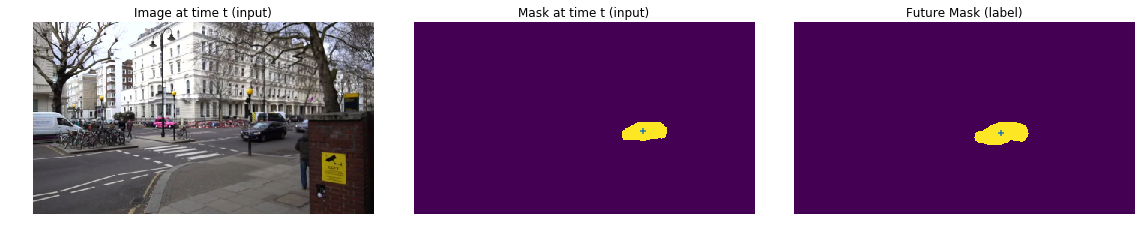

In [750]:


plot_datapoint(rgb,mask,input_centroid,label,future_centroid,name,num,save)

In [751]:
f.close()

In [98]:
f.close()